<a href="https://colab.research.google.com/github/Dukhkasht/ML-and-DL-prjects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('/content/sample_data/diabetes (1).csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#removing values with zero
diabetes_1 = diabetes.loc[(diabetes[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]
diabetes_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


In [ ]:
columns_to_process = ['SkinThickness', 'Insulin']
for column in columns_to_process:
    diabetes_1[column] = diabetes_1[column].replace(0, diabetes_1[column].median())
diabetes_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


<ipython-input-22-36673f02dfd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_1[column] = diabetes_1[column].replace(0, diabetes_1[column].median())
<ipython-input-22-36673f02dfd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_1[column] = diabetes_1[column].replace(0, diabetes_1[column].median())


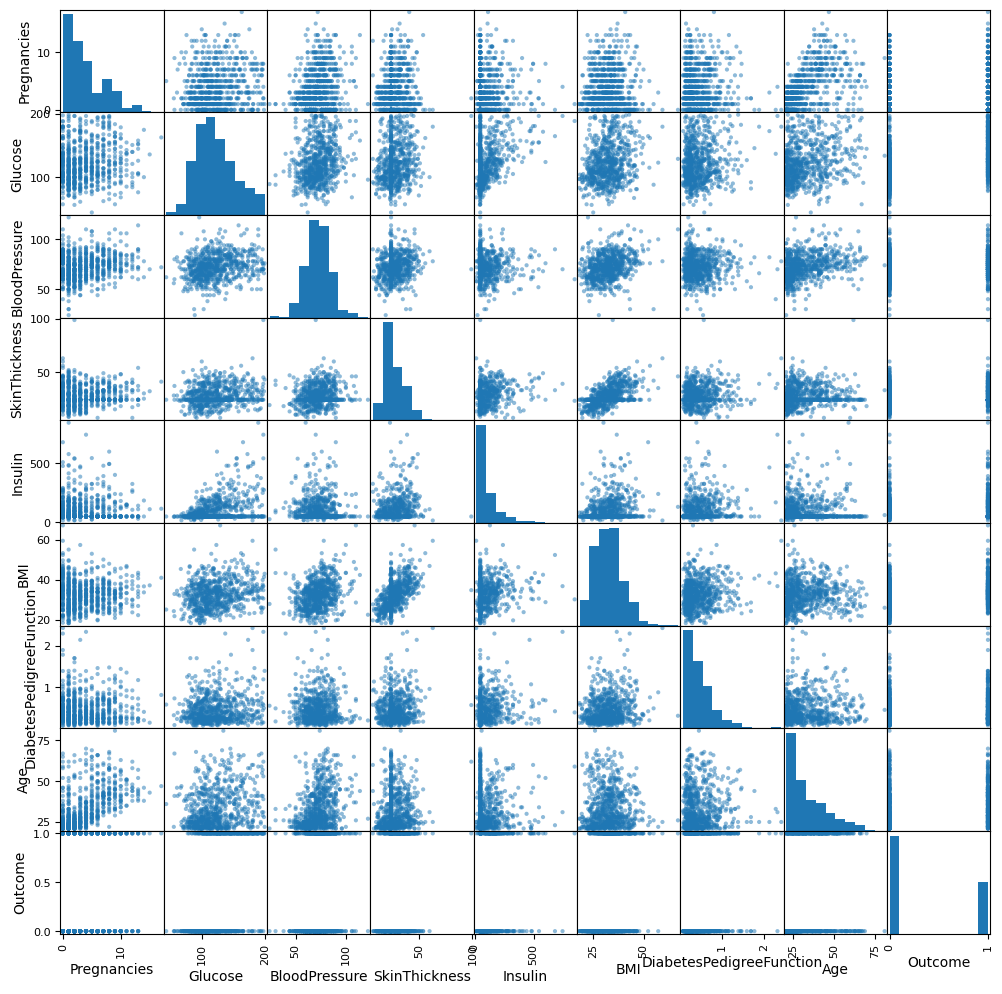

In [ ]:
pd.plotting.scatter_matrix(diabetes_1, figsize=(12,12));

In [ ]:
X = diabetes_1.drop('Outcome', axis=1)
y = diabetes_1['Outcome']

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145



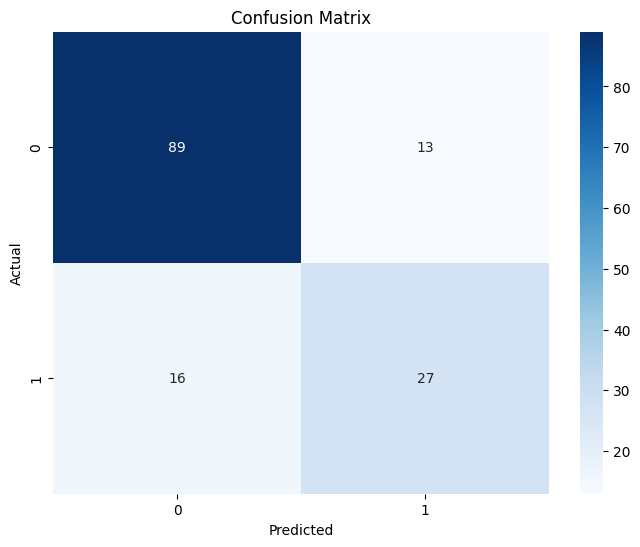

In [ ]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8000
